# Would a new video be trending or not?  

The definition of a _'popular'_ video Youtube is based on the '**number of views (NV)**' by the Youtube uploader. Based on this concept, we define a KPI named as '**video popularity (VP)**' which is computed as: 
1. VP = 1; if NV ∈ [0, 500] views;  
2. VP = 2; if NV ∈ [600, 5000] views;
3. VP = 3; if NV >= 6000 views; 

The features for the model would be as follows:
1. #Likes/#Dislikes
2. Total #Views Previously Attained
3. Total #Comment Counts
4. Category of New Video

## Importing Dependencies

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Settings/Configuration Details

In [51]:
%matplotlib inline
%config Completer.use_jedi = False
sns.set_style('darkgrid')

## Developer Information

This information should provide as a guide for future data scientists/developers trying to run the jupyter notebook. Kindly having the following versions of the dependencies installed: 

In [52]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 0.25.1
numpy            : 1.16.5
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.2.3
setuptools       : 41.4.0
Cython           : 0.29.13
pytest           : 5.2.1
hypothesis       : None
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.8.0
pandas_datareader: None
bs4              : 4.8.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.4.1
matplotl

Please note that Python 3.7.4 was used for this notebook. Kindly set-up a different virtual environment or spin up a docker image accoridngly if information does not match. 

## Dataset Load

In [53]:
df = pd.read_csv('data/USvideos.csv')

In [54]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


The dataset has been loaded. Looks like we are good to go!

## Dataset Summary

In [55]:
df.shape

(40949, 16)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


## Summary Statistics

In [57]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


## Univariate Analysis

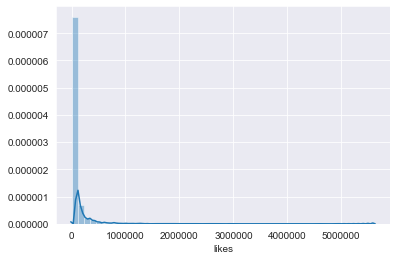

In [58]:
sns.distplot(df['likes'])

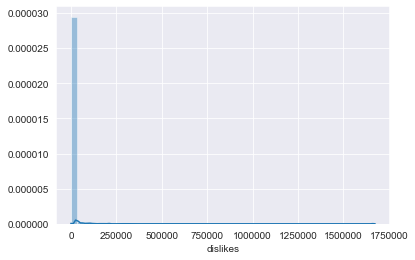

In [59]:
sns.distplot(df['dislikes'])

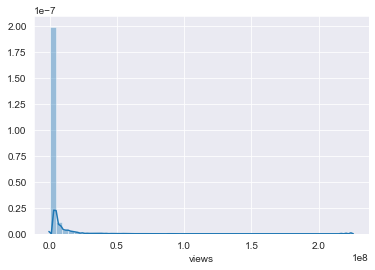

In [60]:
sns.distplot(df['views'])

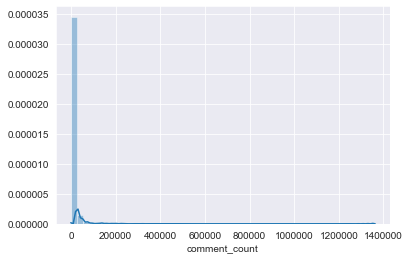

In [61]:
sns.distplot(df['comment_count'])

## Bivariate Analysis

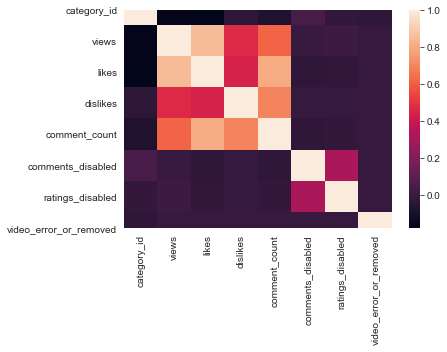

In [62]:
sns.heatmap(df.corr())

## Data Transformation

In [63]:
df_proc = df.groupby('channel_title').sum().reset_index()
df_proc.head()

,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,12 News,44,177970,352,90,0,0.0,0.0,0.0
1,1MILLION Dance Studio,792,20959169,1399898,15030,110408,0.0,0.0,0.0
2,1theK (원더케이),190,57375949,3663362,63329,255669,0.0,0.0,0.0
3,20th Century Fox,135,1082872611,24419452,488761,1509224,0.0,0.0,0.0
4,2CELLOS,20,432186,22900,245,917,0.0,0.0,0.0


In [64]:
df_proc['likes/dislikes'] = df_proc1['likes']/df_proc['dislikes']
df_proc['likes/dislikes'].head()

0     3.911111
1    93.140253
2    57.846516
3    49.961949
4    93.469388
Name: likes/dislikes, dtype: float64

In [65]:
df3 = pd.merge(df, df_proc, on='channel_title')
df3.head()

,video_id,trending_date,title,channel_title,category_id_x,publish_time,tags,views_x,likes_x,dislikes_x,...,description,category_id_y,views_y,likes_y,dislikes_y,comment_count_y,comments_disabled_y,ratings_disabled_y,video_error_or_removed_y,likes/dislikes
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2090,232745266,10307442,501444,995526,0.0,0.0,0.0,20.55552
1,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188590,88099,7150,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2090,232745266,10307442,501444,995526,0.0,0.0,0.0,20.55552
2,2kyS6SvSYSE,17.16.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2325233,91111,7543,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2090,232745266,10307442,501444,995526,0.0,0.0,0.0,20.55552
3,2kyS6SvSYSE,17.17.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2400741,92831,7687,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2090,232745266,10307442,501444,995526,0.0,0.0,0.0,20.55552
4,2kyS6SvSYSE,17.18.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2468267,94303,7802,...,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2090,232745266,10307442,501444,995526,0.0,0.0,0.0,20.55552


In [71]:
dataset = df3.loc[:, ['likes/dislikes', 'views_y', 'comment_count_y', 'category_id_x', 'views_x']].copy()

## Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression().fit(dataset[:, -1], y)

NameError: name 'LinearRegression' is not defined